# Part 1: Time Series Data Summarization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#PCA Lib
from sklearn.decomposition import PCA

### Interface to facilitate euclidean distance calculation

In [2]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
    return sqrt(mean_squared_error(x, y))

# Test of Part 1: Compression and Reconstruction with given 50k time_series

## Load 50k time_series (synthetic and synthetic)

In [3]:
import struct
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_seismic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

## Data compression and reconstruction for 50k seismic time_series

In [4]:
# Following code is to compress and reconstruct seismic data
# every time serie will be compressed from 256 to 128/64/32
# then the compressed data will be "enlarged" from 128/64/32 to 256

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_seismic = []
errorList_64_seismic = []
errorList_32_seismic = []

data_size = 50000

# 1024 -> 128 -> 1024
n_c = 128
pca_128 = PCA(n_components=128)
pca_64 = PCA(n_components=64)
pca_32 = PCA(n_components=32)


resized_128 = pca_128.fit_transform(time_series_seismic)
reconstructed_128 = pca_128.inverse_transform(resized_128)


scale_n = 127 / max(abs(np.amax(resized_128)), abs(np.amin(resized_128)))
resized_128 = np.multiply(resized_128, scale_n).round().astype(np.int8)
resized_128 = np.multiply(resized_128, 1/scale_n).astype(np.float32)

reconstructed_128 = pca_128.inverse_transform(resized_128)

# 1024 -> 64 -> 1024
n_c = 64

resized_64 = pca.fit_transform(time_series_seismic)

scale_n = 127 / max(abs(np.amax(resized_64)), abs(np.amin(resized_64)))
resized_64 = np.multiply(resized_64, scale_n).round().astype(np.int8)
resized_64 = np.multiply(resized_64, 1/scale_n).astype(np.float32)

reconstructed_64 = pca.inverse_transform(resized_64)

# 1024 -> 32 -> 1024
n_c = 32
pca = PCA(n_components=n_c)
resized_32 = pca.fit_transform(time_series_seismic)

scale_n = 127 / max(abs(np.amax(resized_32)), abs(np.amin(resized_32)))
resized_32 = np.multiply(resized_32, scale_n).round().astype(np.int8)
resized_32 = np.multiply(resized_32, 1/scale_n).astype(np.float32)

reconstructed_32 = pca.inverse_transform(resized_32)

for i in range(data_size):
    errorList_128_seismic.append(rmse(time_series_seismic[i], reconstructed_128[i]))
    errorList_64_seismic.append(rmse(time_series_seismic[i], reconstructed_64[i]))   
    errorList_32_seismic.append(rmse(time_series_seismic[i], reconstructed_32[i]))

## Data compression and reconstruction for 50k synthetic time_series

In [5]:
# Following code is to compress and reconstruct synthetic data
# every time serie will be compressed from 256 to 128/64/32
# then the compressed data will be "enlarged" from 128/64/32 to 256

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_synthetic = []
errorList_64_synthetic = []
errorList_32_synthetic = []

data_size = 50000

# 1024 -> 128 -> 1024
n_c = 128
pca_128 = PCA(n_components=n_c)
resized_128 = pca_128.fit_transform(time_series_synthetic)

scale_n = 127 / max(abs(np.amax(resized_128)), abs(np.amin(resized_128)))
resized_128 = np.multiply(resized_128, scale_n).round().astype(np.int8)
resized_128 = np.multiply(resized_128, 1/scale_n).astype(np.float32)

reconstructed_128 = pca_128.inverse_transform(resized_128)

# 1024 -> 64 -> 1024
n_c = 64
pca = PCA(n_components=n_c)
resized_64 = pca.fit_transform(time_series_synthetic)

scale_n = 127 / max(abs(np.amax(resized_64)), abs(np.amin(resized_64)))
resized_64 = np.multiply(resized_64, scale_n).round().astype(np.int8)
resized_64 = np.multiply(resized_64, 1/scale_n).astype(np.float32)

reconstructed_64 = pca.inverse_transform(resized_64)

# 1024 -> 32 -> 1024
n_c = 32
pca = PCA(n_components=n_c)
resized_32 = pca.fit_transform(time_series_synthetic)

scale_n = 127 / max(abs(np.amax(resized_32)), abs(np.amin(resized_32)))
resized_32 = np.multiply(resized_32, scale_n).round().astype(np.int8)
resized_32 = np.multiply(resized_32, 1/scale_n).astype(np.float32)

reconstructed_32 = pca.inverse_transform(resized_32)

for i in range(data_size):
    errorList_128_synthetic.append(rmse(time_series_synthetic[i], reconstructed_128[i]))
    errorList_64_synthetic.append(rmse(time_series_synthetic[i], reconstructed_64[i]))   
    errorList_32_synthetic.append(rmse(time_series_synthetic[i], reconstructed_32[i]))

# Evaluate reconstruction error

In [6]:
def summarize_data(x):
    print("Average:", np.mean(x), " Mean:", np.median(x), " Max:", np.max(x), " Min:", np.min(x), "\n")

### 50k seismic

In [7]:
# Reconstruction error for 50k seismic time_series
print("Reconstruction Error of 50k seismic time series: 128 -> 256")
summarize_data(errorList_128_seismic)
print("Reconstruction Error of 50k seismic time series: 64 -> 256")
summarize_data(errorList_64_seismic)
print("Reconstruction Error of 50k seismic time series: 32 -> 256")
summarize_data(errorList_32_seismic)

Reconstruction Error of 50k seismic time series: 128 -> 256
Average: 0.29105879896275966  Mean: 0.27919099069329534  Max: 0.9891993710557608  Min: 0.10936790956772821 

Reconstruction Error of 50k seismic time series: 64 -> 256
Average: 0.7108636984525653  Mean: 0.7107539659781107  Max: 0.9946710395469742  Min: 0.4742278287873921 

Reconstruction Error of 50k seismic time series: 32 -> 256
Average: 0.8648857727886441  Mean: 0.8675379747743304  Max: 0.9970362560834571  Min: 0.6641404883809747 



### 50k synthetic

In [8]:
# Reconstruction error for 50k synthetic time_series
print("Reconstruction Error of 50k synthetic time series: 128 -> 256")
summarize_data(errorList_128_synthetic)
print("Reconstruction Error of 50k synthetic time series: 64 -> 256")
summarize_data(errorList_64_synthetic)
print("Reconstruction Error of 50k synthetic time series: 32 -> 256")
summarize_data(errorList_32_synthetic)

Reconstruction Error of 50k synthetic time series: 128 -> 256
Average: 0.0808525887110026  Mean: 0.07634289962870568  Max: 0.23456719829904066  Min: 0.030412934184257515 

Reconstruction Error of 50k synthetic time series: 64 -> 256
Average: 0.11948339035520579  Mean: 0.11289891561786417  Max: 0.38830413304152106  Min: 0.03413045913087845 

Reconstruction Error of 50k synthetic time series: 32 -> 256
Average: 0.16979049380992423  Mean: 0.1602247236724552  Max: 0.5572558501663039  Min: 0.040828903472695695 



## Visualize reconstruction errors of 50k time series with Boxplot

In [9]:
plt.rcParams['figure.figsize'] = [12, 6]

<function matplotlib.pyplot.show(*args, **kw)>

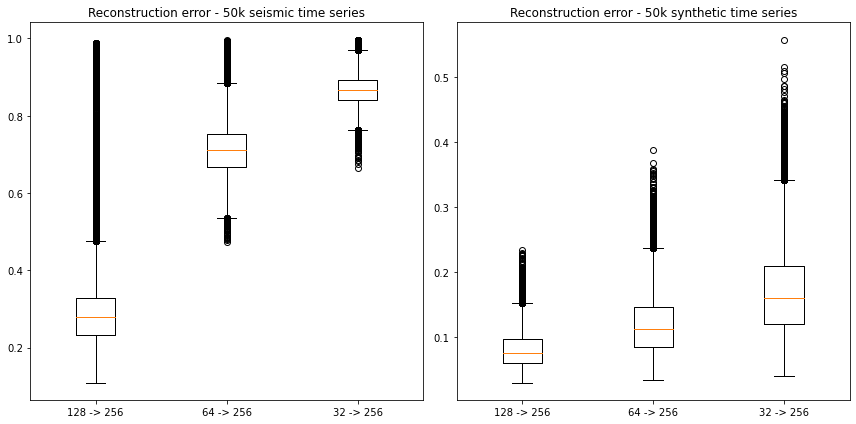

In [10]:
plt.subplot(1,2,1)
plt.boxplot([errorList_128_seismic, errorList_64_seismic, errorList_32_seismic])
plt.title('Reconstruction error - 50k seismic time series')
plt.xticks([1, 2, 3], ['128 -> 256', '64 -> 256', '32 -> 256'])

plt.subplot(1,2,2)
plt.boxplot([errorList_128_synthetic, errorList_64_synthetic, errorList_32_synthetic])
plt.title('Reconstruction error - 50k synthetic time series')
plt.xticks([1, 2, 3], ['128 -> 256', '64 -> 256', '32 -> 256'])

plt.tight_layout()
plt.show